# Aerodynamics Quiz-2

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
l = np.linspace(0, 1, 41)     
y = [(l[i]+l[i+1])/2 - 0.5 for i in range(0,40)]
y = np.asarray(y).reshape(40,1)
 # midpoints of each segment

In [3]:
theta = []
for x in y:
  theta.append(np.arccos(-2*x))
theta = np.asarray(theta)
theta = theta.reshape(40,1) # theta vector

#Elliptical Wing

In [4]:
rhs = np.sin(theta)*np.pi*0.1*np.pi*5/180 # alpha 5 degrees
 #rhs vector 

In [5]:
M = np.zeros((40,40))
for i in range(40):
  for j in range(40):
    M[i,j] = 2*np.sin((j+1)*theta[i,0]) + (j+1)*np.sin((j+1)*theta[i,0])*np.pi*0.1
 #created M matrix of 40x40 dimension

In [6]:
M_inv = np.linalg.inv(M) #computed inverse
A = np.dot(M_inv, rhs)
 #computed A matrix with contains fourier coefficients

In [7]:
BC = []
for i in range(40):
  s = 0
  for j in range(40):
    s += (20*A[j,0]*np.sin((j+1)*theta[i,0]))
  BC.append(s)
BC = np.asarray(BC).reshape(40,1) #bound circulation using numerical methods

In [8]:
BC_ana = ((np.pi/(1+0.5*0.1*np.pi))*5*np.pi/180)*np.sin(theta) # Analytical Solution


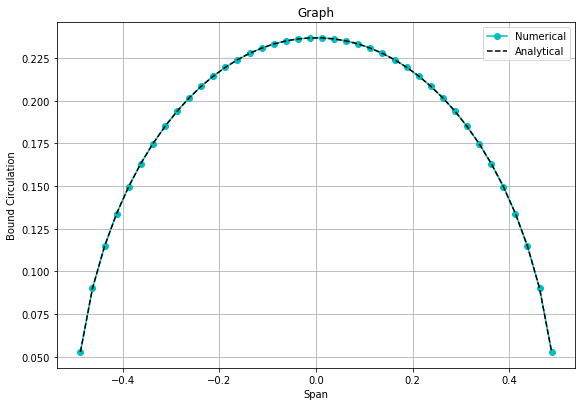

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
plt.plot(y,np.squeeze(BC), 'co-', label = 'Numerical')
plt.plot(y, np.squeeze(BC_ana),'k--', label = 'Analytical')
plt.xlabel('Span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.legend()
plt.grid()
plt.show()

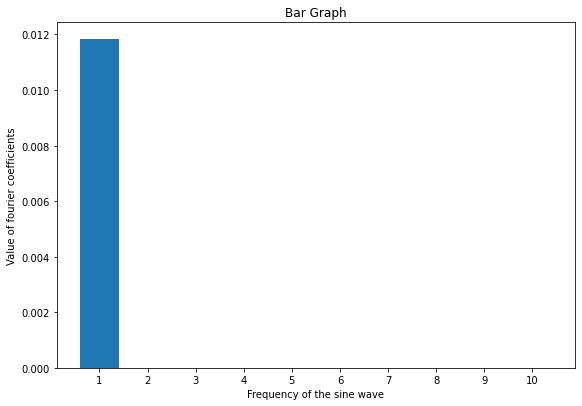

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
num = np.arange(1,11)
ax.bar(np.squeeze(num), np.squeeze(A[:10]))
ax.set_xticks(num)
ax.set_xticklabels([str(i) for i in num])
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
plt.show()

#Taper Ratio 1:1

In [11]:
rhs1 = np.pi*np.pi*0.1*5/180
rhs1 = np.ones((40,1))*rhs1


In [12]:
M1 = np.zeros((40,40))
for i in range(40):
  for j in range(40):
    M1[i,j] = 2*np.sin((j+1)*theta[i,0]) + (j+1)*0.1*np.pi*np.sin((j+1)*theta[i,0])/np.sin(theta[i,0])
 #created M1 matrix of 40x40 dimension

In [13]:
A1 = np.linalg.solve(M1, rhs1)


In [14]:
BC1 = []
for i in range(40):
  s = 0
  for j in range(40):
    s += (20*A1[j,0]*np.sin((j+1)*theta[i,0]))
  BC1.append(s)
BC1 = np.asarray(BC1).reshape(40,1)


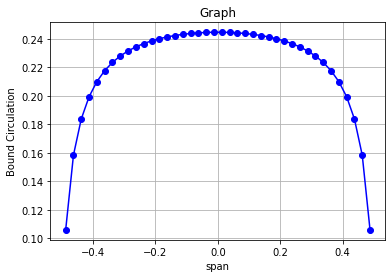

In [15]:
plt.plot(y,np.squeeze(BC1), 'bo-')
plt.xlabel('span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

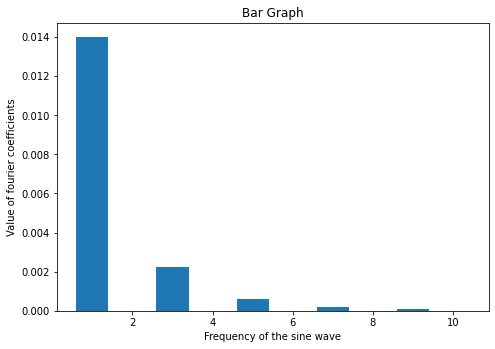

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num = np.arange(1,11)
ax.bar(np.squeeze(num), np.squeeze(A1[:10]))
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
plt.show()

#Taper Ratio 2:1


In [17]:
rhs2 = np.zeros((40,1))
rhs2[:20,0] = np.pi*0.1*5*np.pi*(1+y[:20,0])/180
rhs2[20:,0] = np.pi*0.1*5*np.pi*(1-y[20:,0])/180


In [18]:
M2 = np.zeros((40,40))
for i in range(20):
  for j in range(40):
    M2[i,j] = 2*np.sin((j+1)*theta[i,0]) + (j+1)*0.1*(1+y[i,0])*np.pi*np.sin((j+1)*theta[i,0])/np.sin(theta[i,0])
for i in range(20,40):
  for j in range(40):
    M2[i,j] = 2*np.sin((j+1)*theta[i,0]) + (j+1)*0.1*(1-y[i,0])*np.pi*np.sin((j+1)*theta[i,0])/np.sin(theta[i,0])
 #created M2 matrix of 40x40 dimension 

In [19]:
A2 = linalg.solve(M2, rhs2)

In [20]:
BC2 = []
for i in range(40):
  s = 0
  for j in range(40):
    s += (20*A2[j,0]*np.sin((j+1)*theta[i,0]))
  BC2.append(s)
BC2 = np.asarray(BC2).reshape(40,1)


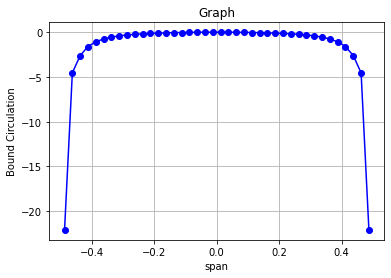

In [21]:
plt.plot(y,np.squeeze(BC2), 'bo-')
plt.xlabel('span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

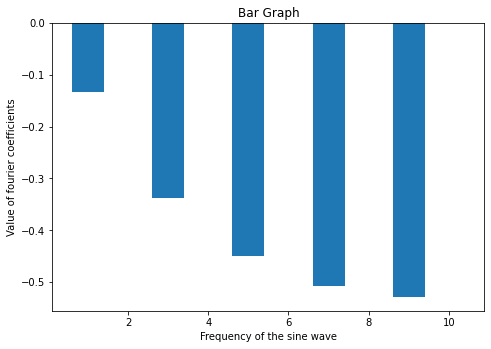

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num = np.arange(1,11)
ax.bar(np.squeeze(num), np.squeeze(A2[:10]))
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
plt.show()

#Taper 3:1

In [23]:
rhs3 = np.zeros((40,1))
rhs3[:20] = np.pi*0.1*5*np.pi*(1+4*y[:20]/3)/180
rhs3[20:] = np.pi*0.1*5*np.pi*(1-4*y[20:]/3)/180


In [24]:
M3 = np.zeros((40,40))
for i in range(20):
  for j in range(40):
    M3[i,j] = 2*np.sin((j+1)*theta[i,0]) + ((j+1)*0.1*(1+4*y[i,0]/3)*2*np.pi*np.sin((j+1)*theta[i,0])/(np.sin(theta[i,0])))
for i in range(20,40):
  for j in range(40):
    M3[i,j] = 2*np.sin((j+1)*theta[i,0]) + ((j+1)*0.1*(1-4*y[i,0]/3)*2*np.pi*np.sin((j+1)*theta[i,0])/(np.sin(theta[i,0])))
 #created M3 matrix of 40x40 dimension

In [25]:
A3 = np.linalg.solve(M3, rhs3)

In [26]:
BC3 = []
for i in range(40):
  s = 0
  for j in range(40):
    s += (20*A3[j,0]*np.sin((j+1)*theta[i,0]))
  BC3.append(s)
BC3 = np.asarray(BC3).reshape(40,1)


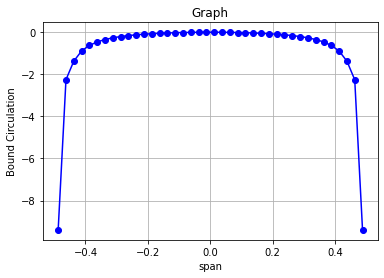

In [27]:
plt.plot(y,np.squeeze(BC3), 'bo-')
plt.xlabel('span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

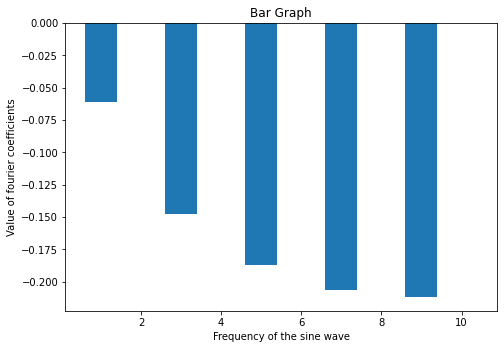

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num = np.arange(1,11)
ax.bar(np.squeeze(num), np.squeeze(A3[:10]))
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
plt.show()

#Combined Plots

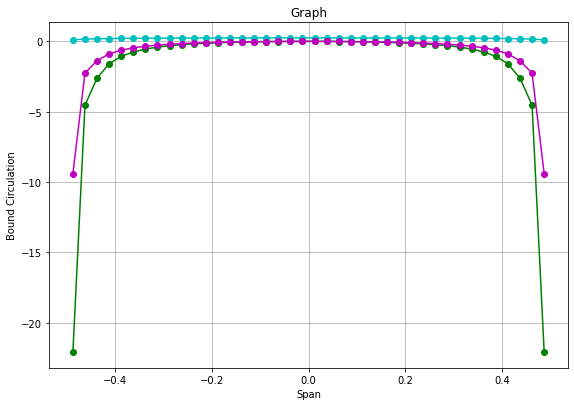

In [29]:
fig = plt.figure()                 #Clearly overfitting for 2:1 and 3:1 taper ratios
ax = fig.add_axes([0,0,1.2,1.2])
plt.plot(y,np.squeeze(BC1), 'co-')
plt.plot(y,np.squeeze(BC2), 'go-')
plt.plot(y,np.squeeze(BC3), 'mo-')
plt.xlabel('Span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

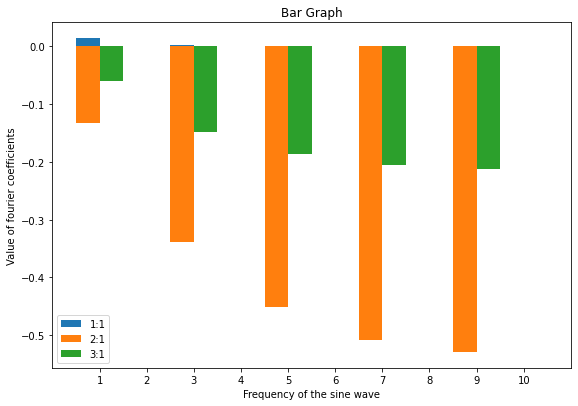

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
num = np.arange(1,11)
ax.bar(np.squeeze(num)-0.25, np.squeeze(A1[:10]),0.5, label = '1:1')
ax.bar(np.squeeze(num)-0.25, np.squeeze(A2[:10]), 0.5, label = '2:1')
ax.bar(np.squeeze(num)+0.25, np.squeeze(A3[:10]), 0.5, label = '3:1')
ax.set_xticks(num)
ax.set_xticklabels([str(i) for i in num])
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
ax.legend()
plt.show()

#20 segments for 2:1 taper ratio

In [31]:
l1 = np.linspace(0,1,21)
y1 = [(l1[i]+l1[i+1])/2 - 0.5 for i in range(20)]
y1 = np.asarray(y1).reshape(20,1)
theta1 = []
for x in y1:
  theta1.append(np.arccos(-2*x))
theta1 = np.asarray(theta1)
theta1 = theta1.reshape(20,1)


In [32]:
rhs2_ = np.zeros((20,1))
rhs2_[:10,0] = np.pi*0.1*5*np.pi*(1+y1[:10,0])/180
rhs2_[10:,0] = np.pi*0.1*5*np.pi*(1-y1[10:,0])/180

In [33]:
M2_ = np.zeros((20,20))
for i in range(10):
  for j in range(20):
    M2_[i,j] = 2*np.sin((j+1)*theta1[i,0]) + (j+1)*0.1*(1+y1[i,0])*np.pi*np.sin((j+1)*theta1[i,0])/np.sin(theta1[i,0])
for i in range(10,20):
  for j in range(20):
    M2_[i,j] = 2*np.sin((j+1)*theta1[i,0]) + (j+1)*0.1*(1-y1[i,0])*np.pi*np.sin((j+1)*theta1[i,0])/np.sin(theta1[i,0])


In [34]:
A2_ = linalg.solve(M2_, rhs2_)

In [35]:
BC2_ = []
for i in range(20):
  s = 0
  for j in range(20):
    s += (20*A2_[j,0]*np.sin((j+1)*theta1[i,0]))
  BC2_.append(s)
BC2_ = np.asarray(BC2_).reshape(20,1)

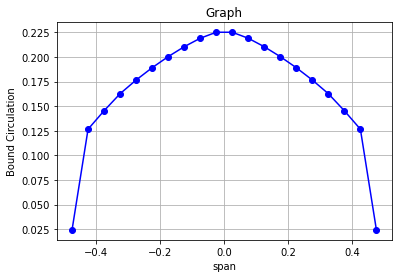

In [36]:
plt.plot(y1,np.squeeze(BC2_), 'bo-')
plt.xlabel('span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

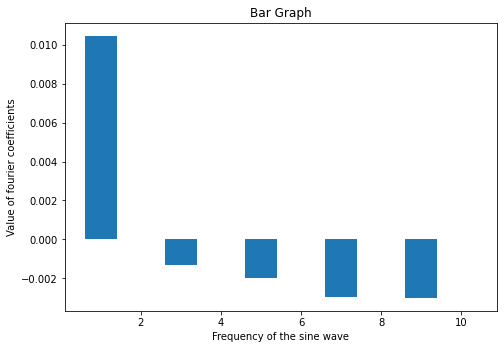

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num = np.arange(1,11)
ax.bar(np.squeeze(num), np.squeeze(A2_[:10]))
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
plt.show()

#3:1 taper ratio for 20 segments

In [38]:
rhs3_ = np.zeros((20,1))
rhs3_[:10,0] = np.pi*0.1*5*np.pi*(1+4*y1[:10,0]/3)/180
rhs3_[10:,0] = np.pi*0.1*5*np.pi*(1-4*y1[10:,0]/3)/180

In [39]:
M3_ = np.zeros((20,20))
for i in range(10):
  for j in range(20):
    M3_[i,j] = 2*np.sin((j+1)*theta1[i,0]) + (j+1)*0.1*(1+4*y1[i,0]/3)*np.pi*np.sin((j+1)*theta1[i,0])/np.sin(theta1[i,0])
for i in range(10,20):
  for j in range(20):
    M3_[i,j] = 2*np.sin((j+1)*theta1[i,0]) + (j+1)*0.1*(1-4*y1[i,0]/3)*np.pi*np.sin((j+1)*theta1[i,0])/np.sin(theta1[i,0])

In [40]:
A3_ = linalg.solve(M3_, rhs3_)

In [41]:
BC3_ = []
for i in range(20):
  s = 0
  for j in range(20):
    s += (20*A3_[j,0]*np.sin((j+1)*theta1[i,0]))
  BC3_.append(s)
BC3_ = np.asarray(BC3_).reshape(20,1)

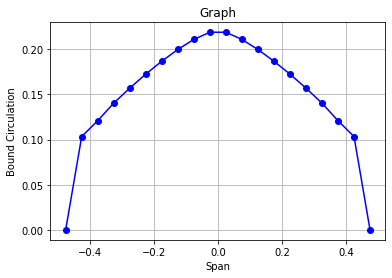

In [42]:
plt.plot(y1,np.squeeze(BC3_), 'bo-')
plt.xlabel('Span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

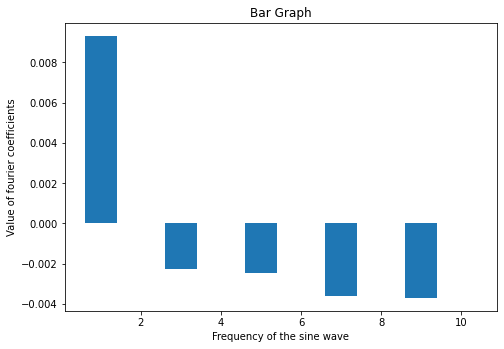

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num = np.arange(1,11)
ax.bar(np.squeeze(num), np.squeeze(A3_[:10]))
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
plt.show()

#1:1 Taper Ratio for 20 segments

In [44]:
rhs1_ = np.pi*np.pi*0.1*5/180
rhs1_ = np.ones((20,1))*rhs1_

In [45]:
M1_ = np.zeros((20,20))
for i in range(20):
  for j in range(20):
    M1_[i,j] = 2*np.sin((j+1)*theta1[i,0]) + (j+1)*0.1*np.pi*np.sin((j+1)*theta1[i,0])/np.sin(theta1[i,0])
 #created M1_ matrix of 20x20 dimension

In [46]:
A1_ = linalg.solve(M1_, rhs1_)

In [47]:
BC1_ = []
for i in range(20):
  s = 0
  for j in range(20):
    s += (20*A1_[j,0]*np.sin((j+1)*theta1[i,0]))
  BC1_.append(s)
BC1_ = np.asarray(BC1_).reshape(20,1)

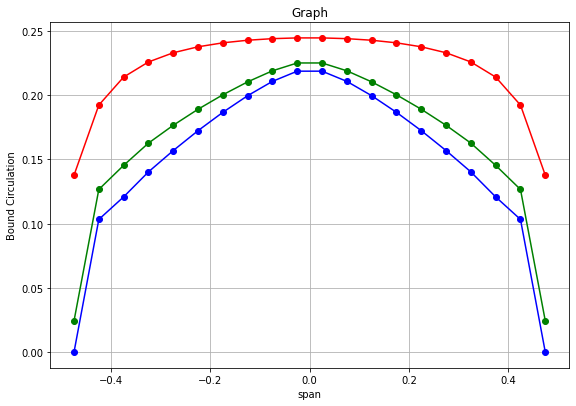

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
plt.plot(y1,np.squeeze(BC1_), 'ro-')
plt.plot(y1,np.squeeze(BC2_), 'go-')
plt.plot(y1,np.squeeze(BC3_), 'bo-')
plt.xlabel('span')
plt.ylabel('Bound Circulation')
plt.title('Graph')
plt.grid()
plt.show()

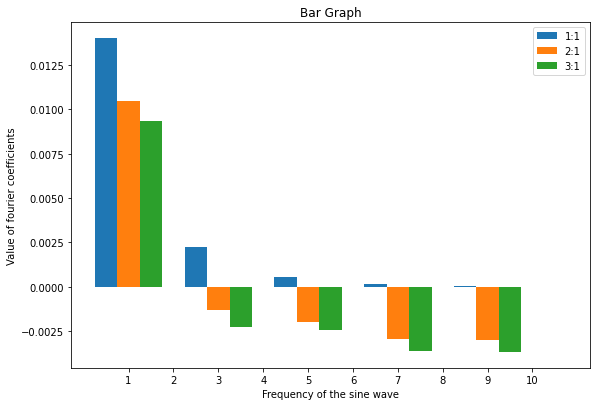

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
num = np.arange(1,11)
ax.set_xticks(num)
ax.set_xticklabels([str(i) for i in num])
ax.bar(np.squeeze(num)-0.5, np.squeeze(A1_[:10]), 0.5, label = '1:1')
ax.bar(np.squeeze(num), np.squeeze(A2_[:10]), 0.5, label = '2:1')
ax.bar(np.squeeze(num)+0.5, np.squeeze(A3_[:10]), 0.5, label = '3:1')
plt.xlabel('Frequency of the sine wave')
plt.ylabel('Value of fourier coefficients')
plt.title('Bar Graph')
ax.legend()
plt.show()

#Inferences
1. Since the lift coefficient depends on first fourier coefficient (A1) alone, the lift is highest for rectangular wing and least for 3:1 tapered wing.
2. By comparing the values of induced drag coefficient in terms of fourier coefficients it can be concluded that - Tapered wings have lower induced drag compared to rectagular wing. 
3. It can be observed that the bound circulation values at each point decreases as we increase the taper ratio.
4. Evidently, we can see that the graphs coresponding to tapered wings in case of 40 segments, are overfitting. Hence the results/plots obtained in that case make less sense.
5. However, by decreasing the number of segments to 20 we have this problem is solved and the plots obtained make much more sense to draw conclusions.